In [5]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [6]:
df=pd.read_csv('final_df.csv')

In [7]:
import ast
df['diff']=df['diff'].apply(lambda x: ast.literal_eval(x))

In [8]:
def try_get(obj, keys, defaultVal=None):
    try:
        for k in keys:
            obj = obj[k]
        return obj
    except:
        return defaultVal

def extract_keys(obj, extractKeys):
    extracted = []
    for kl in extractKeys:
        value = try_get(obj,kl)
        if value is not None:
            extracted.append(kSep.join(kl))
    return ','.join(extracted)

kSep = '-'
extractKeys = [ ('info', 'version'),
                ('info', 'title'),
                ('info', 'description'),
                ('info', 'contact', 'name'),
                ('info', 'contact', 'url'),
                ('info', 'contact', 'email'),
                ('info', 'license', 'name'),
                ('info', 'license', 'url'),
                ('info', 'termsOfService'),

                ('servers','added'),
                ('servers', 'deleted'),
                ('servers', 'modified'),

                ('paths', 'modified'),
                ('paths', 'added'),
                ('paths', 'deleted'),         

                ('endpoints', 'added'),
                ('endpoints', 'deleted'),
                ('endpoints', 'modified'),

                
                ('components', 'securitySchemes', 'added'),
                ('components', 'securitySchemes', 'deleted'),
                ('components', 'securitySchemes', 'modified'),
                ('components', 'securitySchemes', 'removed'),
                ('components', 'headers', 'added'),
                ('components', 'headers', 'deleted'),
                ('components', 'links', 'added'),
                ('components', 'links', 'deleted'),
                ('components', 'parameters', 'added'),
                ('components', 'parameters', 'deleted'),
                ('components', 'responses', 'added'),
                ('components', 'responses', 'deleted'),
                ('components', 'schemas', 'added'), 
                ('components', 'schemas', 'deleted'),
                ('components', 'requestBodies', 'added'),
                ('components', 'requestBodies', 'deleted'),

                ('tags', 'added'),
                ('tags', 'deleted'),
                ('tags', 'modified'),

                ('security', 'added'),
                ('security', 'deleted'),
                ('security', 'modified'),

                ('externalDocs', 'added'),
                ('externalDocs', 'deleted')
]

df['components'] = df['diff'].map(lambda d: extract_keys(d, extractKeys))

In [9]:
allowed_labels= ['major.minor.dev', 'major.dev', 'minor.dev', 'minor.patch.pre']

new = df[df['label'].isin(allowed_labels)]

In [10]:
new = df[['label','api_spec_id','info_version']]
new.to_csv('new.csv', index=False)

In [11]:
df['label'] = df['label'].replace(np.nan, 'no change')

In [13]:
df['api_spec_id'].nunique()

3544

In [14]:
tren = df.groupby('label')['api_spec_id'].nunique()
tren

label
dev                         8
major                     106
major.minor                99
major.minor.dev             1
major.minor.patch         136
major.minor.patch.dev       2
major.minor.patch.pre       2
major.minor.post            2
major.minor.pre             4
major.patch               142
major.patch.dev             1
major.patch.post            1
major.patch.pre             1
major.post                  1
major.pre                   5
minor                     258
minor.dev                   5
minor.patch               303
minor.patch.dev            10
minor.patch.pre            18
minor.pre                  14
minor.pre.dev               2
no change                3544
patch                     407
patch.dev                   2
patch.post                  2
patch.pre                   6
post                        3
pre                        38
pre.dev                     5
Name: api_spec_id, dtype: int64

In [15]:
df['type_of_change'] = np.where(df['errors'].isna(), 'Non-Breaking', np.where(df['errors'].str.contains('errors'), 'Breaking', 'Non-Breaking'))

In [16]:
df['type_of_change'] = np.where(df['errors'].isna(), 'Non-Breaking', np.where(df['errors'].str.contains('errors'), 'Breaking', 'Non-Breaking'))

In [17]:
df['components'].groupby(df['type_of_change']).count()

type_of_change
Breaking        11923
Non-Breaking    64046
Name: components, dtype: int64

In [18]:
new = df[['components','api_spec_id']]

In [19]:
new.groupby('components')['api_spec_id'].nunique()

components
                                                                                      3544
components-headers-added                                                                 1
components-parameters-added                                                              7
components-parameters-added,components-parameters-deleted                                4
components-parameters-added,components-parameters-deleted,components-schemas-added       3
                                                                                      ... 
tags-added,tags-deleted                                                                 10
tags-added,tags-modified                                                                 1
tags-deleted                                                                             8
tags-deleted,tags-modified                                                               1
tags-modified                                                                  

In [20]:
df['components'] = df['components'].astype(str)
df['components']= df['components'].replace(np.nan, 'None')


In [21]:
df['components'].value_counts()

components
                                                                                                                                                                                  29722
paths-modified,endpoints-modified                                                                                                                                                 19450
info-version                                                                                                                                                                       3753
paths-added,endpoints-added                                                                                                                                                        3691
paths-modified,paths-added,endpoints-added,endpoints-modified                                                                                                                      1683
                                                                     

In [22]:
import pandas as pd


keywords = ['paths-modified', 'endpoints-modified', 'paths-added', 'paths-deleted', 'endpoints-added', 'endpoints-deleted', 'components-schemas-deleted', 'components-parameters-added', 'tags-modified','servers-added','servers-deleted','tags-modified','tags-added','tags-deleted','security-modified','security-added','security-deleted','info_version','info-contact-name','info-contact-email','components-parameters_added','info-description','components-schemas-added','info-title','tags-added','tags-deleted','components-responses-added','security-added','security-deleted','components-requestBodies-added','components-requestBodies-deleted','components-headers-added','components-headers-deleted','components-links-added','components-links-deleted','components-responses-deleted','servers-added','servers_deleted']



counts = {}
for i, row in df.iterrows():
    components = row['components'].split(',')
    for component in components:
        if component in keywords:
            if component in counts:
                counts[component] += 1
            else:
                counts[component] = 1




df_counts = pd.DataFrame(counts.items(), columns=['Keyword', 'Count'])

#df_counts


In [23]:
df_counts

,Keyword,Count
0,paths-added,12162
1,info-title,1410
2,security-added,261
3,paths-deleted,5076
4,info-description,2702
5,servers-added,1043
6,servers-deleted,871
7,endpoints-added,13463
8,endpoints-deleted,5696
9,components-headers-deleted,10


In [24]:
non_breaking_features = df[df['type_of_change'] == 'Non-Breaking']['components'].value_counts().reset_index()

In [25]:
non_breaking_features

,components,count
0,,29327
1,"paths-modified,endpoints-modified",15809
2,info-version,3753
3,"paths-added,endpoints-added",3691
4,"paths-modified,paths-added,endpoints-added,end...",1321
...,...,...
833,"paths-modified,paths-added,paths-deleted,endpo...",1
834,"paths-modified,paths-added,paths-deleted,endpo...",1
835,"security-added,security-modified",1
836,"info-description,info-contact-email,paths-modi...",1


In [26]:
breaking_features = df[df['type_of_change'] == 'Breaking']['components'].value_counts().reset_index()

In [27]:
breaking_features

,components,count
0,"paths-modified,endpoints-modified",3641
1,"paths-added,paths-deleted,endpoints-added,endp...",1581
2,"paths-modified,paths-added,paths-deleted,endpo...",739
3,,395
4,"paths-deleted,endpoints-deleted",373
...,...,...
1003,"info-title,paths-modified,paths-deleted,endpoi...",1
1004,"info-version,info-title,info-description,paths...",1
1005,"info-description,servers-added,servers-deleted...",1
1006,"info-description,paths-modified,paths-deleted,...",1


In [28]:

breaking_features = breaking_features.rename(columns={'count': 'breaking'})

non_breaking_features = non_breaking_features.rename(columns={'count': 'non_breaking'})


In [29]:
features_changes = pd.merge(breaking_features, non_breaking_features, on='components', how='outer')
features_changes.fillna(0, inplace=True)

In [30]:
features_changes.head(50)

,components,breaking,non_breaking
0,"paths-modified,endpoints-modified",3641.0,15809.0
1,"paths-added,paths-deleted,endpoints-added,endp...",1581.0,0.0
2,"paths-modified,paths-added,paths-deleted,endpo...",739.0,7.0
3,,395.0,29327.0
4,"paths-deleted,endpoints-deleted",373.0,0.0
5,"paths-modified,paths-added,endpoints-added,end...",362.0,1321.0
6,"paths-modified,endpoints-modified,components-s...",283.0,488.0
7,"paths-modified,paths-deleted,endpoints-deleted...",256.0,3.0
8,"info-version,paths-modified,endpoints-modified",159.0,955.0
9,"paths-modified,endpoints-added,endpoints-deleted",151.0,0.0


In [31]:
major_features = df[df['label'] == 'major']['components'].value_counts().reset_index()

In [32]:
no_label_features = df[df['label'] == 'no change']['components'].value_counts().reset_index()

In [33]:
no_label_features = pd.DataFrame(no_label_features)

In [34]:
# Split the components column by comma separator and explode the resulting values
no_label_features = no_label_features.assign(components=no_label_features['components'].str.split(',')).explode('components')

# Group by the components column and sum the corresponding counts
result = no_label_features.groupby('components').sum()


In [35]:
new_df = pd.DataFrame({'components': result.index, 'count': result['count']}).reset_index(drop=True)

new_df.drop( 0, inplace=True)

In [36]:
new_df.sort_values(by=['count'], ascending=False, inplace=True)
new_df.rename(columns={'count': 'no_label_count'}, inplace=True)

In [37]:
minor_features = df[df['label'] == 'minor']['components'].value_counts().reset_index()

In [38]:
minor_features.dropna()
minor_features

,components,count
0,info-version,450
1,"info-version,paths-modified,endpoints-modified",140
2,,76
3,"info-version,paths-modified,paths-added,endpoi...",40
4,"info-version,paths-modified,endpoints-modified...",28
...,...,...
100,"info-version,info-description,paths-modified,p...",1
101,"info-version,servers-added,paths-modified,endp...",1
102,"info-version,info-license-name",1
103,"info-version,info-title,info-description,info-...",1


In [39]:
patch_features = df[df['label'] == 'patch']['components'].value_counts().reset_index()
patch_features=pd.DataFrame(patch_features)

In [40]:
# Split the components column by comma separator and explode the resulting values
patch_features = patch_features.assign(components=patch_features['components'].str.split(',')).explode('components')

# Group by the components column and sum the corresponding counts
result1 = patch_features.groupby('components').sum()

patch_counts = pd.DataFrame({'components': result1.index, 'count': result1['count']}).reset_index(drop=True)



In [41]:
patch_counts.drop( 0, inplace=True)
patch_counts.sort_values(by=['count'], ascending=False, inplace=True)

In [42]:
patch_counts.rename(columns={'count':'patch_count'}, inplace=True)

In [43]:
# Split the components column by comma separator and explode the resulting values
minor_features = minor_features.assign(components=minor_features['components'].str.split(',')).explode('components')

# Group by the components column and sum the corresponding counts
result2 = minor_features.groupby('components').sum()

minor_counts = pd.DataFrame({'components': result2.index, 'count': result2['count']}).reset_index(drop=True)

minor_counts.drop( 0, inplace=True)
minor_counts.sort_values(by=['count'], ascending=False, inplace=True)
minor_counts.rename(columns={'count':'minor_count'}, inplace=True)

In [44]:
# Split the components column by comma separator and explode the resulting values
major_features = major_features.assign(components=major_features['components'].str.split(',')).explode('components')

# Group by the components column and sum the corresponding counts
result3 = major_features.groupby('components').sum()

major_counts = pd.DataFrame({'components': result3.index, 'count': result3['count']}).reset_index(drop=True)

major_counts.drop( 0, inplace=True)
major_counts.sort_values(by=['count'], ascending=False, inplace=True)
major_counts.rename(columns={'count':'major_count'}, inplace=True)

In [45]:
from functools import reduce

df_final = reduce(lambda x,y: pd.merge(x,y, on='components', how='outer'), [new_df, patch_counts, minor_counts, major_counts])

In [46]:
df_final.fillna(0, inplace=True)
df_final['major_count']= df_final['major_count'].astype(int)
df_final['minor_count']= df_final['minor_count'].astype(int)
df_final['patch_count']= df_final['patch_count'].astype(int)
df_final

,components,no_label_count,patch_count,minor_count,major_count
0,paths-modified,29565,826,378,129
1,endpoints-modified,28326,803,369,128
2,endpoints-added,12721,241,196,39
3,paths-added,11491,206,181,37
4,endpoints-deleted,5330,111,65,24
5,paths-deleted,4742,91,60,24
6,components-schemas-added,3680,124,181,21
7,info-description,2174,123,47,99
8,tags-added,1440,54,22,10
9,components-schemas-deleted,1308,59,53,8


In [47]:
df_final = df_final.set_index("components")

In [48]:
df1 = df_final.iloc[:len(df_final)//2]
df2 = df_final.iloc[len(df_final)//2:]

In [49]:
df1

,no_label_count,patch_count,minor_count,major_count
components,,,,
paths-modified,29565,826,378,129
endpoints-modified,28326,803,369,128
endpoints-added,12721,241,196,39
paths-added,11491,206,181,37
endpoints-deleted,5330,111,65,24
paths-deleted,4742,91,60,24
components-schemas-added,3680,124,181,21
info-description,2174,123,47,99
tags-added,1440,54,22,10


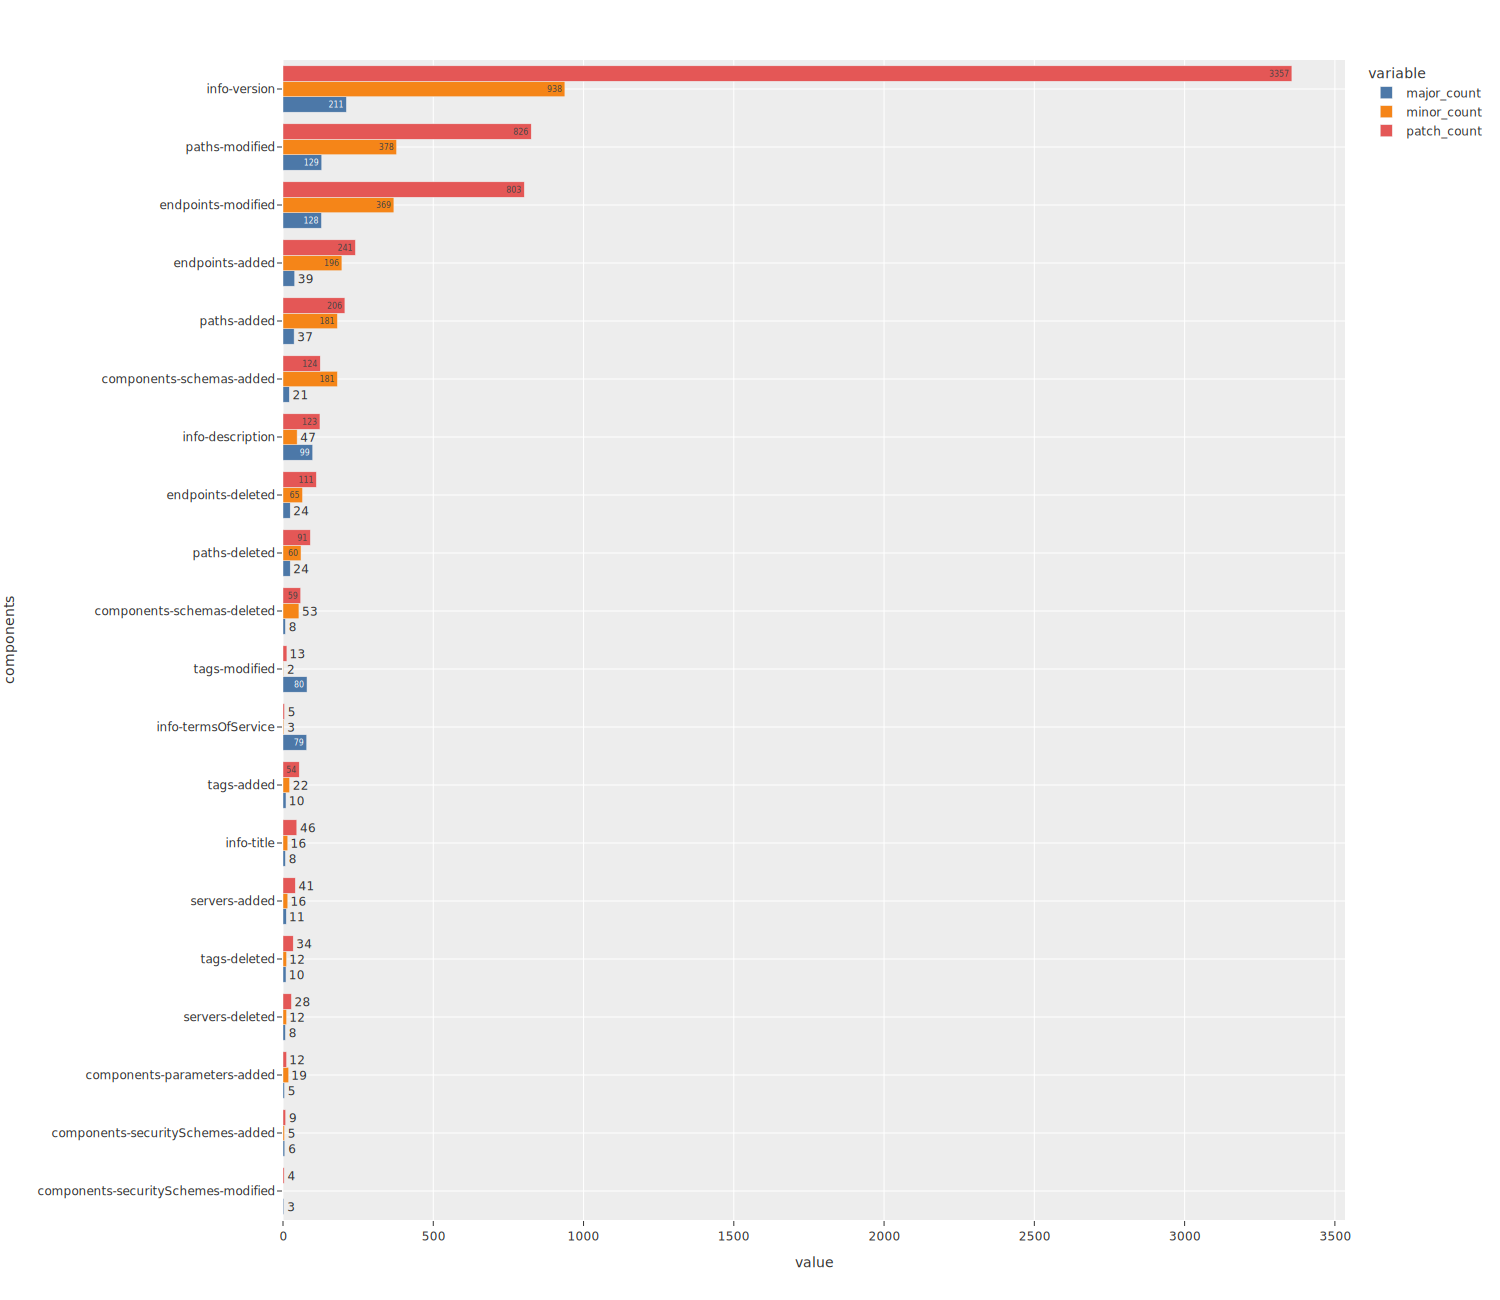

In [50]:
import plotly.express as px


fig = px.bar(df1, x=['major_count', 'minor_count','patch_count'], y=df1.index,color_discrete_sequence=px.colors.qualitative.T10,template='ggplot2',text_auto='True', barmode='group')

fig.update_layout( barmode='group',yaxis={'categoryorder':'total ascending'}, height=1300, width=1500)

fig.show("svg")

/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_6924/1011089250.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



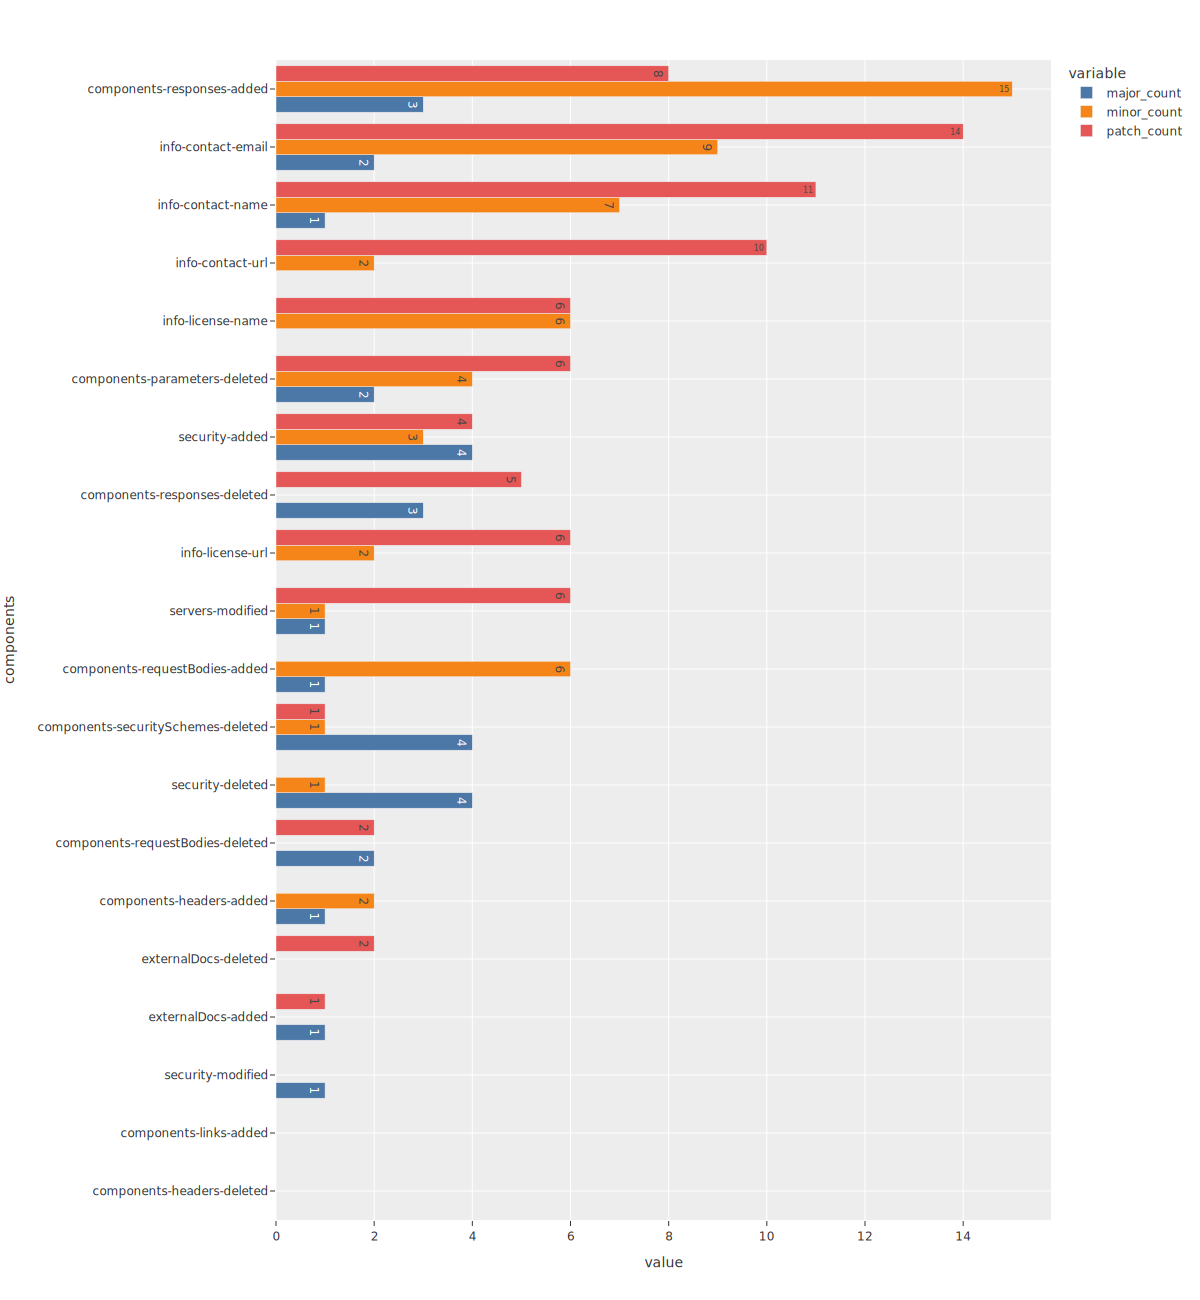

In [51]:
import plotly.express as px
df2.fillna(0, inplace=True)

fig = px.bar(df2, x=['major_count', 'minor_count','patch_count'], y=df2.index,color_discrete_sequence=px.colors.qualitative.T10,template='ggplot2',text_auto='True', barmode='group')

fig.update_layout( barmode='group',yaxis={'categoryorder':'total ascending'}, height=1300, width=1200)
fig.show("svg")

In [58]:
features_changes

,components,breaking,non_breaking
0,"paths-modified,endpoints-modified",3641.0,15809.0
1,"paths-added,paths-deleted,endpoints-added,endp...",1581.0,0.0
2,"paths-modified,paths-added,paths-deleted,endpo...",739.0,7.0
3,,395.0,29327.0
4,"paths-deleted,endpoints-deleted",373.0,0.0
...,...,...,...
1671,"paths-modified,paths-added,paths-deleted,endpo...",0.0,1.0
1672,"paths-modified,paths-added,paths-deleted,endpo...",0.0,1.0
1673,"security-added,security-modified",0.0,1.0
1674,"info-description,info-contact-email,paths-modi...",0.0,1.0


# Split the components column by comma separator and explode the resulting values
breaking_features = breaking_features.assign(components=breaking_features['components'].str.split(',')).explode('components')

# Group by the components column and sum the corresponding counts
result4 = breaking_features.groupby('components').sum()

breaking_counts = pd.DataFrame({'components': result4.index, 'count': result4['count']}).reset_index(drop=True)

breaking_counts.drop( 0, inplace=True)
breaking_counts.sort_values(by=['count'], ascending=False, inplace=True)
breaking_counts.rename(columns={'count':'breaking_count'}, inplace=True)
breaking_counts

In [57]:
non_breaking_features

,components,non_breaking
0,,29327
1,paths-modified,15809
1,endpoints-modified,15809
2,info-version,3753
3,paths-added,3691
...,...,...
837,info-termsOfService,1
837,servers-added,1
837,servers-deleted,1
837,paths-modified,1


# Split the components column by comma separator and explode the resulting values
non_breaking_features = non_breaking_features.assign(components=non_breaking_features['components'].str.split(',')).explode('components')

# Group by the components column and sum the corresponding counts
result5 = non_breaking_features.groupby('components').sum()

non_breaking_counts = pd.DataFrame({'components': result5.index, 'count': result5['non_breaking']}).reset_index(drop=True)

non_breaking_counts.drop( 0, inplace=True)
non_breaking_counts.sort_values(by=['non_breaking'], ascending=False, inplace=True)
non_breaking_counts

In [ ]:
non_breaking_counts['components'].isin(breaking_counts['components']).value_counts()

components
True     39
False     1
Name: count, dtype: int64

In [ ]:
prac = pd.merge(non_breaking_counts, breaking_counts, on='components', how='inner')

In [ ]:
prac

,components,non_breaking_count,breaking_count
0,paths-modified,22956,8640
1,endpoints-modified,22155,8149
2,endpoints-added,8109,5354
3,paths-added,7375,4787
4,info-version,5680,857
5,components-schemas-added,2555,1597
6,info-description,1940,762
7,tags-added,1031,564
8,info-title,859,551
9,servers-added,711,332


In [ ]:
prac['breaking_percent'] = round(prac['breaking_count'] / prac['breaking_count'].sum() * 100, 2)
prac['non_breaking_percent'] = round(prac['non_breaking_count'] / prac['non_breaking_count'].sum() * 100, 2)


In [ ]:
prac = prac.set_index("components")

In [ ]:
pracc= prac.head(50)

In [ ]:
pracc. drop(['breaking_percent', 'non_breaking_percent'], axis=1, inplace=True)

/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_95035/3086050477.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pracc.to_csv('prac.csv')

In [ ]:
pracc_transposed = pracc.T

In [ ]:
pracc_transposed

components,paths-modified,endpoints-modified,endpoints-added,paths-added,info-version,components-schemas-added,info-description,tags-added,info-title,servers-added,...,components-requestBodies-added,security-deleted,externalDocs-deleted,components-responses-deleted,components-parameters-deleted,components-requestBodies-deleted,externalDocs-added,components-headers-added,security-modified,components-headers-deleted
non_breaking_count,22956,22155,8109,7375,5680,2555,1940,1031,859,711,...,70,69,35,33,28,19,18,9,9,2
breaking_count,8640,8149,5354,4787,857,1597,762,564,551,332,...,87,79,58,58,133,86,69,13,4,8


In [ ]:
important_features = ['paths-modified','endpoints-modified','endpoints-added','endpoints-deleted','paths-added','paths-deleted','components-schemas-added','components-parameters-added','servers-added','servers-deleted','tags-modified','tags-added','info-description','tags-deleted','components-parameters-deleted']

new_prac = prac[prac.index.isin(important_features)]

In [ ]:
new_prac

,non_breaking_count,breaking_count,breaking_percent,non_breaking_percent
components,,,,
paths-modified,22956,8640,18.76,29.39
endpoints-modified,22155,8149,17.69,28.37
endpoints-added,8109,5354,11.62,10.38
paths-added,7375,4787,10.39,9.44
components-schemas-added,2555,1597,3.47,3.27
info-description,1940,762,1.65,2.48
tags-added,1031,564,1.22,1.32
servers-added,711,332,0.72,0.91
servers-deleted,609,262,0.57,0.78


In [60]:
grouped_df = df.groupby("api_spec_id")

# define a function to filter the groups based on your condition
def filter_func(group):
    if group.label.isin(['major']).any():
        return group.reset_index(drop=True)
    else:
        return pd.DataFrame()

# apply the filter function to each group and concatenate the results into a new DataFrame
new_df = pd.concat([filter_func(group) for name, group in grouped_df], ignore_index=True)


In [61]:
new_df = df.query('label == "major"')
patch_df = df.query('label == "patch"')
minor_df = df.query('label == "minor"')



In [62]:
new_df['label'].value_counts()

label
major    223
Name: count, dtype: int64

In [63]:
grouped_df = df.groupby("api_spec_id")

# define a function to filter the groups based on your condition
def filter_func(group):
    if group.label.value_counts().index.isin(['patch','no change']).all():
        return group.reset_index(drop=True)
    else:
        return pd.DataFrame()
patch_df = pd.concat([filter_func(group) for name, group in grouped_df], ignore_index=True)


In [64]:
patch_df['label'].value_counts()

label
no change    56412
patch          668
Name: count, dtype: int64

In [65]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Convert the 'Date' column to a datetime format
new_df['commit_date'] = pd.to_datetime(new_df['commit_date'])

# Group the data by year and label type and count the number of releases
df_grouped = new_df.groupby([new_df['commit_date'].dt.year, 'type_of_change'])['type_of_change'].count().reset_index(name='count')


# Pivot the data to have label types as columns and years as rows
major_pivot = df_grouped.pivot(index='commit_date', columns='type_of_change', values='count')

# Fill any missing values with 0
major_pivot.fillna(0, inplace=True)


In [66]:
major_pivot

type_of_change,Breaking,Non-Breaking
commit_date,,
2016,2,7
2017,2,6
2018,1,16
2019,7,100
2020,8,29
2021,11,19
2022,8,7


In [67]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Convert the 'Date' column to a datetime format
patch_df['commit_date'] = pd.to_datetime(patch_df['commit_date'])

# Group the data by year and label type and count the number of releases
df_grouped = patch_df.groupby([patch_df['commit_date'].dt.year, 'type_of_change'])['type_of_change'].count().reset_index(name='count')


# Pivot the data to have label types as columns and years as rows
patch_pivot = df_grouped.pivot(index='commit_date', columns='type_of_change', values='count')

# Fill any missing values with 0
patch_pivot.fillna(0, inplace=True)


In [68]:
patch_pivot

type_of_change,Breaking,Non-Breaking
commit_date,,
2014,0.0,5.0
2015,183.0,1328.0
2016,689.0,3233.0
2017,949.0,6399.0
2018,903.0,4692.0
2019,1402.0,6923.0
2020,2513.0,12787.0
2021,2365.0,9230.0
2022,418.0,3061.0


In [69]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Convert the 'Date' column to a datetime format
minor_df['commit_date'] = pd.to_datetime(minor_df['commit_date'])

# Group the data by year and label type and count the number of releases
df_grouped = minor_df.groupby([minor_df['commit_date'].dt.year, 'type_of_change'])['type_of_change'].count().reset_index(name='count')


# Pivot the data to have label types as columns and years as rows
minor_pivot = df_grouped.pivot(index='commit_date', columns='type_of_change', values='count')

# Fill any missing values with 0
minor_pivot.fillna(0, inplace=True)


In [70]:
minor_pivot = minor_pivot.drop([2015, 2023])
minor_pivot

type_of_change,Breaking,Non-Breaking
commit_date,,
2016,3,14
2017,2,9
2018,9,28
2019,28,87
2020,39,205
2021,50,300
2022,29,206


In [71]:
pip install -U kaleido


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


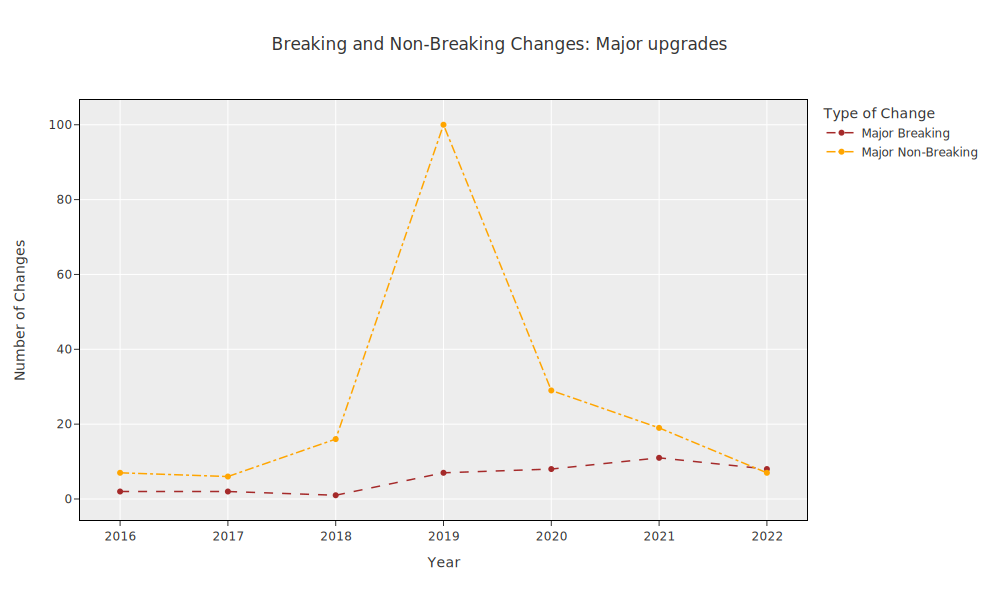

In [72]:
import pandas as pd
import plotly.express as px
import kaleido


fig = go.Figure()
fig.add_trace(go.Scatter(x=major_pivot.index, y=major_pivot['Breaking'], name='Major Breaking',
                            line=dict(color='brown', width=1.5, dash='dash')))
fig.add_trace(go.Scatter(x=major_pivot.index, y=major_pivot['Non-Breaking'], name='Major Non-Breaking',
                            line=dict(color='orange', width=1.5, dash='dashdot')))


fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(width=1000, height=600,legend_title_text='Type of Change',template='ggplot2', title = 'Breaking and Non-Breaking Changes: Major upgrades', xaxis_title = 'Year', yaxis_title = 'Number of Changes')
fig.update_traces(mode='lines+markers')

fig.show("svg")


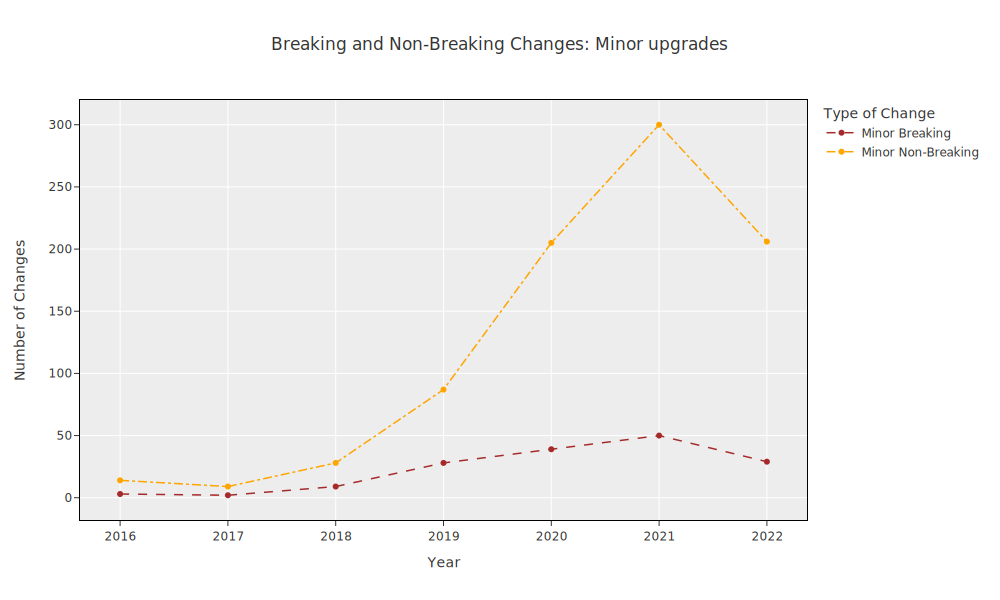

In [73]:
import pandas as pd
import plotly.express as px


fig = go.Figure()
fig.add_trace(go.Scatter(x=minor_pivot.index, y=minor_pivot['Breaking'], name='Minor Breaking',
                            line=dict(color='brown', width=1.5, dash='dash')))
fig.add_trace(go.Scatter(x=minor_pivot.index, y=minor_pivot['Non-Breaking'], name='Minor Non-Breaking',
                            line=dict(color='orange', width=1.5, dash='dashdot')))


fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(width=1000, height=600,legend_title_text='Type of Change',template='ggplot2', title = 'Breaking and Non-Breaking Changes: Minor upgrades', xaxis_title = 'Year', yaxis_title = 'Number of Changes')
fig.update_traces(mode='lines+markers')

fig.show("svg")


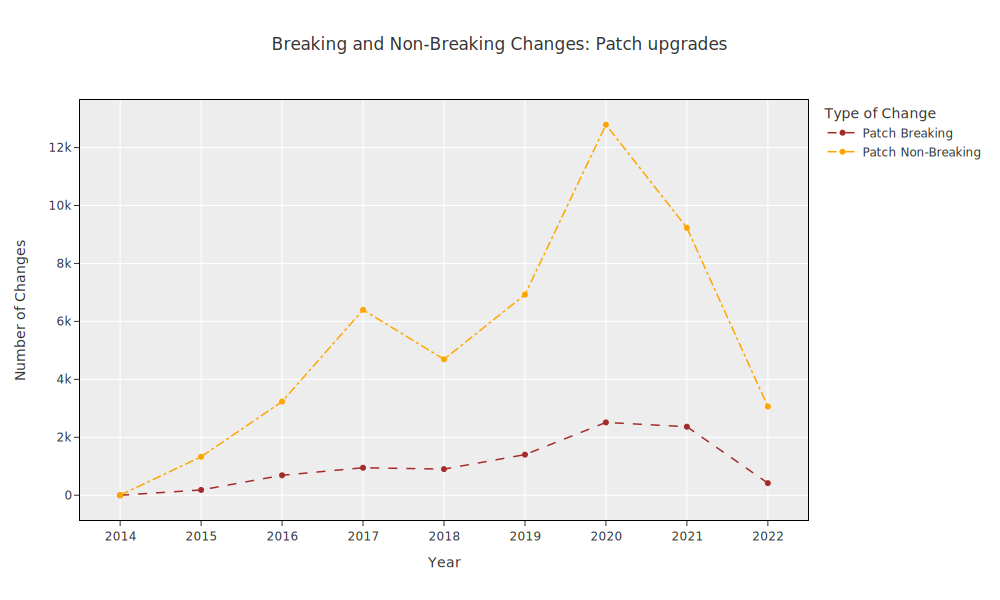

In [74]:
import pandas as pd
import plotly.express as px


fig = go.Figure()
fig.add_trace(go.Scatter(x=patch_pivot.index, y=patch_pivot['Breaking'], name='Patch Breaking',
                            line=dict(color='brown', width=1.5, dash='dash')))
fig.add_trace(go.Scatter(x=patch_pivot.index, y=patch_pivot['Non-Breaking'], name='Patch Non-Breaking',
                            line=dict(color='orange', width=1.5, dash='dashdot')))


fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(width=1000, height=600,legend_title_text='Type of Change',template='ggplot2', title = 'Breaking and Non-Breaking Changes: Patch upgrades', xaxis_title = 'Year', yaxis_title = 'Number of Changes')
fig.update_traces(mode='lines+markers')

fig.show("svg")
